# matplotlib

In [1]:
import matplotlib.pyplot as plt

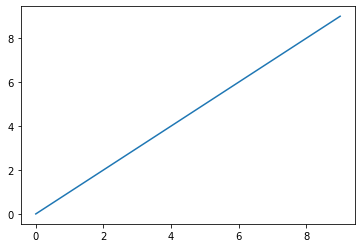

In [2]:
import numpy as np

data = np.arange(10)
plt.plot(data)

## figure와 subplot
matplotlib의 그래프는 Figure 객체 내에 존재하며 새로운 figure는 다음 함수로 생성
```python
plt.figure()
```

In [3]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

빈 figure로는 그림을 그릴 수 없으며 add_subplot을 사용해 최소 하나 이상의 subplot을 생성

In [4]:
ax1 = fig.add_subplot(2, 2, 1)

위 코드는 figure가 2x2 크기고 4개의 subplot 중에서 첫번째를 선택하겠다는 의미  
참고로 subplot은 1부터 숫자가 매겨지며 다음과 같이 2개의 subplot을 더 추가

In [5]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

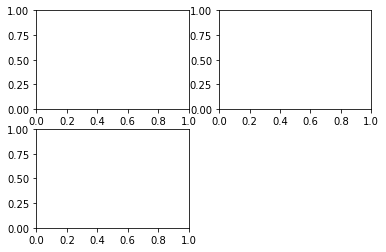

In [6]:
fig

plt.plot(data) 명령은 matplotlib의 가장 최근의 figure와 그 subplot을 그리며  
subplot이 없으면 subplot 하나를 생성되며 이렇게 figure와 subplot이 생성되는 과정을 숨겨줌

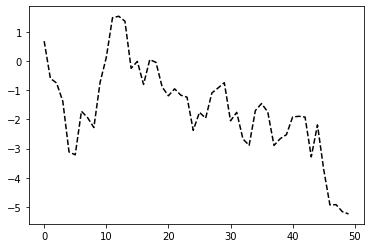

In [7]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

'k--'는 검은 점선을 그리기 위한 스타일 옵션

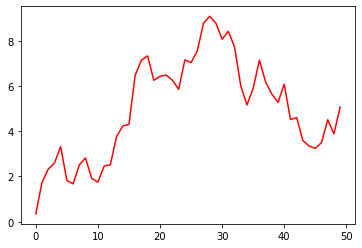

In [8]:
plt.plot(np.random.randn(50).cumsum(), 'r-') #빨간실선

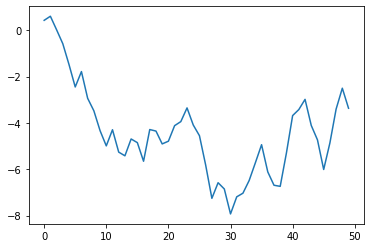

In [9]:
plt.plot(np.random.randn(50).cumsum()) #파란실선

fig 의 subplot 안에 그리기 위해서는 각 AxesSubPlot을 호출하여 subplot 작성  
이때 언더스코어 _ 는 변수에 할당할 필요가 없을때 사용된다 (예: for i in ~ 문에서 i를 사용하지 않는 경우)

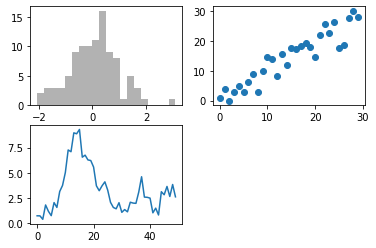

In [10]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
_ = ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
_ = ax3.plot(np.random.randn(50).cumsum())
fig

subplot 간의 간격 조절
```python
subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
```

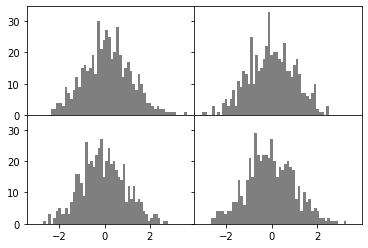

In [11]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

색상, 마커, 선 스타일
```python
ax.plot(x, y, 'g--')
ax.plot(x, y, linestyle='--', color='g')
```

r, g, b, k 등의 색상 문자열이 존재하지만 RGB코드(#FFFFFF)를 직접 입력하는 것도 가능

In [12]:
#plt.plot?

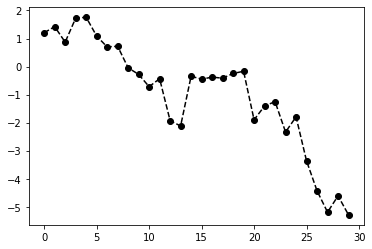

In [13]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

위는 보다 명시적으로 다음과 동일  
```python
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
```

In [14]:
data = np.random.randn(30).cumsum()

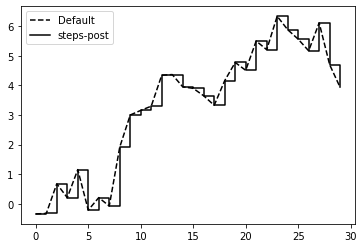

In [15]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

범례를 생성하기 위해서는 label 지정 여부와 관계 없이 반드시 plt.legend 호출 (축에 대한 범례는 ax.legend)

눈금, 라벨, 범례

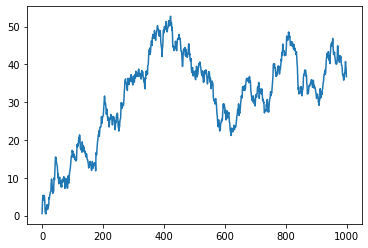

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

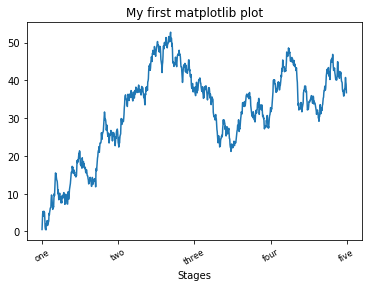

In [17]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
fig

savefig 를 이용하여 그래프를 파일로 저장하며 활성화된 그래프를 저장할때는 plt.savefig(),  
지정된 figure를 저장할때는 figure명.savefig() 로 그래프를 저장  
매개면수인 dpi는 dot resoultion per inch 로 해상도, bbox_inches는 그래프의 둘레 제거 여부를 의미

In [18]:
fig.savefig('plot.png')

In [19]:
fig.savefig('plot.png', dpi=400, bbox_inches='tight')

plt.rc 메소드를 이용하여 전역에서의 figure에 대한 설정을 하는 것이 가능  
figsize=(x, y)를 통해 figure의 크기를 설정

In [20]:
plt.rc('figure', figsize=(10, 10))

## pandas에서 seaborn으로 그래프 그리기
matplotlib은 저수준의 시각화 툴로 수동적으로 설정해야하는 부분이 많으며,  
pandas에 내장된 라이브러리를 통해 seaborn으로 쉽게 시각화 가능

In [21]:
import pandas as pd

<AxesSubplot:>

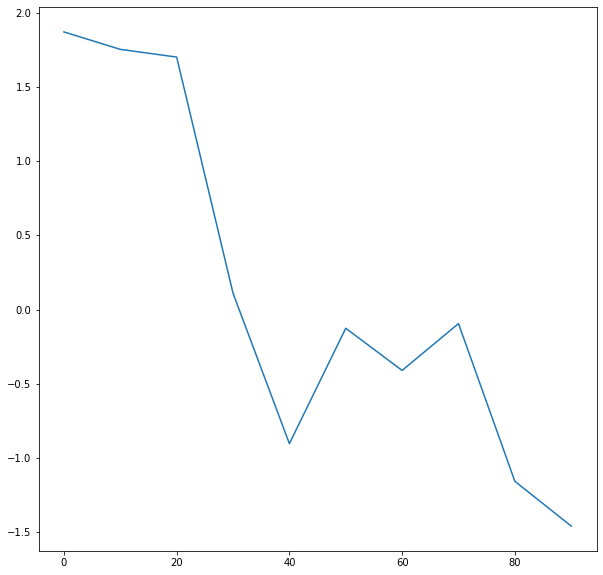

In [22]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

DataFrame의 경우 plot 메소드는 하나의 subplot에 각 칼럼별로 선그래프를 그리고 자동으로 범례를 생성

<AxesSubplot:>

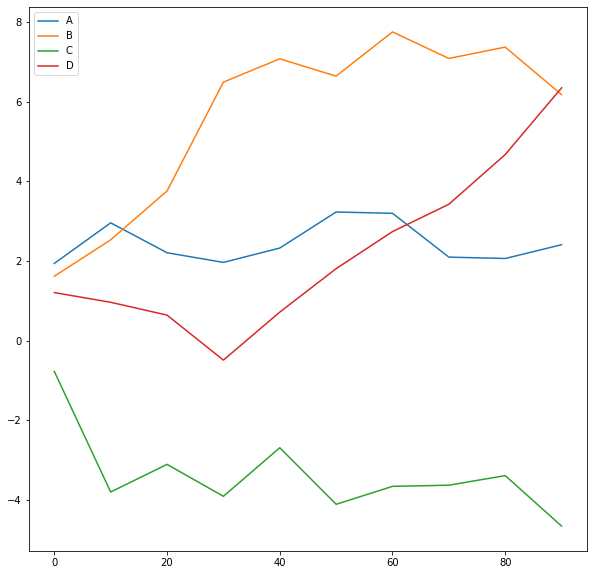

In [23]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A','B','C','D'],
                 index=np.arange(0, 100, 10))
df.plot()

plot.bar()와 plot.barh()는 각각 수직막대그래프와 수평막대그래프를 그림

<AxesSubplot:>

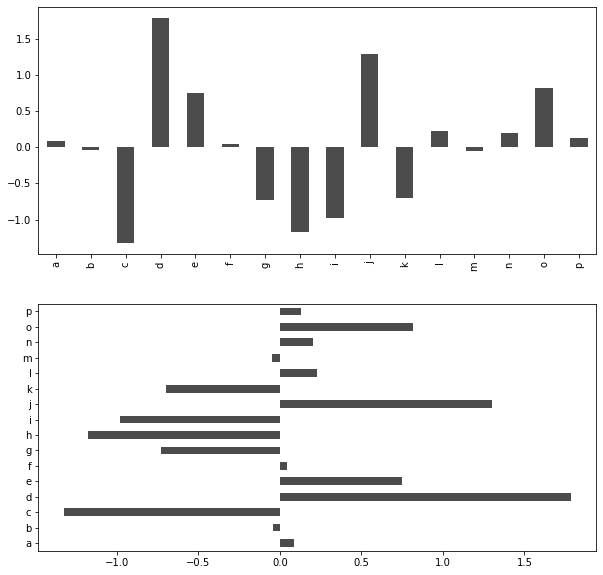

In [24]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [25]:
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.232162,0.071273,0.994395,0.669106
two,0.357423,0.361091,0.521262,0.415955
three,0.563084,0.654998,0.026228,0.096004
four,0.329588,0.783540,0.179730,0.137254
five,0.559932,0.908264,0.236392,0.263913
six,0.704385,0.616167,0.327026,0.231258


<AxesSubplot:>

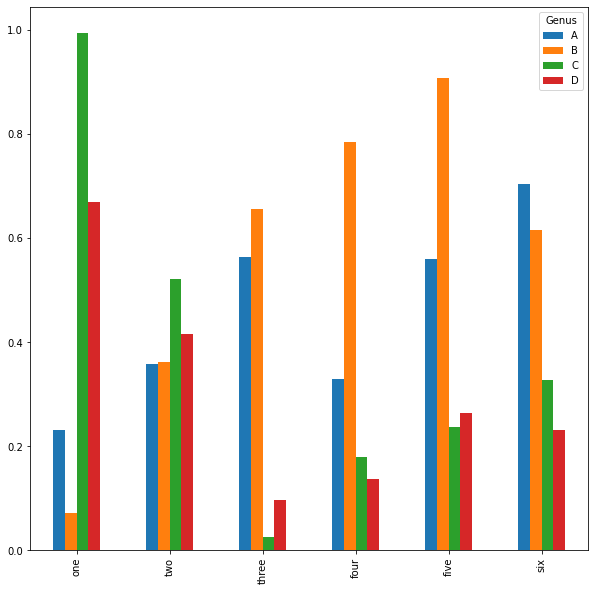

In [26]:
df.plot.bar()

<AxesSubplot:>

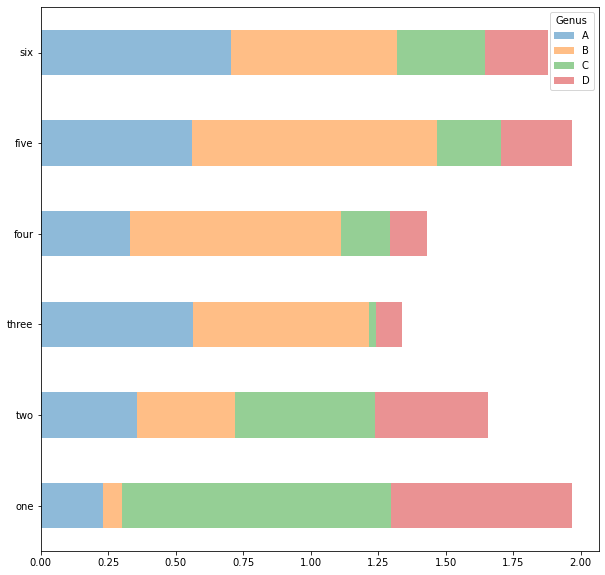

In [27]:
df.plot.barh(stacked=True, alpha=0.5)

히스토그램과 밀도 그래프는 plot.hist를 통해 생성

In [28]:
import seaborn as sns

seaborn 패키지의 장점 중 하나는 다양한 데이터셋을 파일없이 패키지에서 바로 로드할 수 있다는 편의성

In [29]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


<AxesSubplot:ylabel='Frequency'>

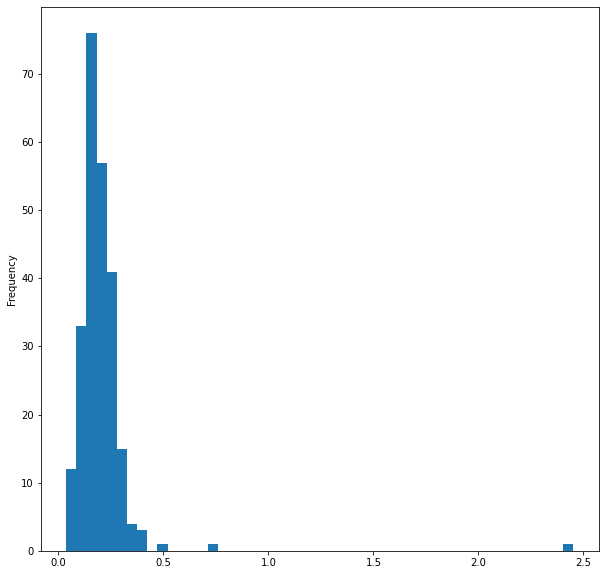

In [31]:
tips['tip_pct'].plot.hist(bins=50)

밀도의 경우 KDE 그래프를 통해 나타냄

<AxesSubplot:ylabel='Density'>

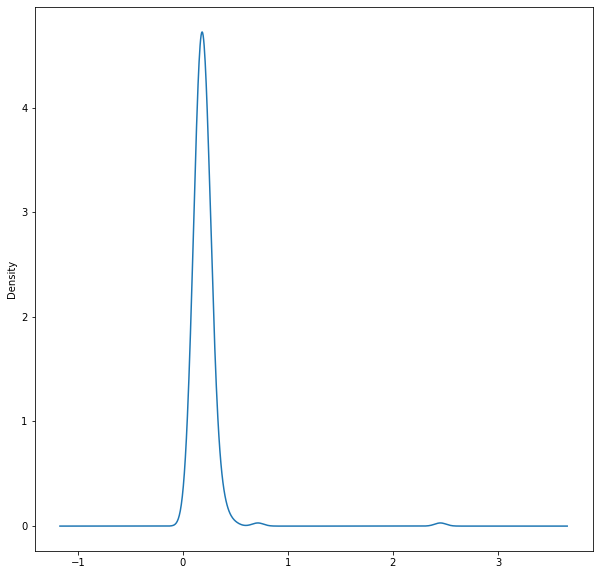

In [32]:
tips['tip_pct'].plot.density()

패싯 그리드와 범주형 데이터는 추가적인 그룹 차원을 가지는 범주형 데이터를 시각화 하는데 유용

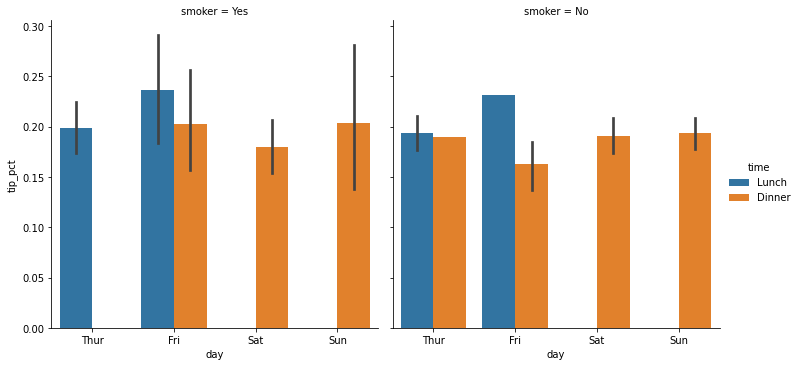

In [33]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips['tip_pct']<1])

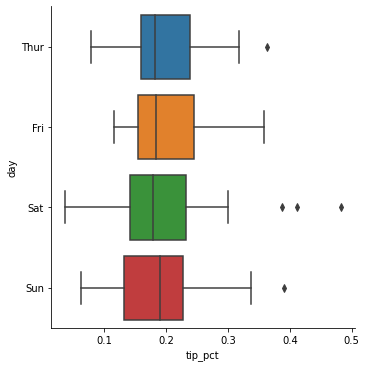

In [34]:
sns.catplot(x='tip_pct', y='day', kind='box',
              data=tips[tips.tip_pct<0.5])

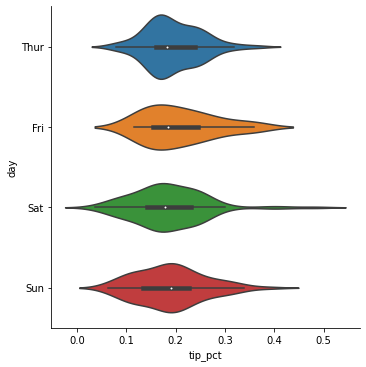

In [35]:
sns.catplot(x='tip_pct', y='day', kind='violin',
              data=tips[tips.tip_pct<0.5])